In [ ]:
import sys
sys.path.append('../')

In [ ]:
from datetime import datetime as dt
import os
import pandas as pd
import re

from mibi_bin_tools import bin_files
from toffy import qc_comp
from ark.utils import io_utils

### Define file parameters

* `base_dir`: this is the top-level directory to store the qc metrics from different runs
* `bin_file_path`: the directory containing your bin files
* `panel_path`: the CSV defining your panel parameters
* `qc_dir`: the directory to save the QC visualizations to

In [ ]:
base_dir = os.path.join('..', 'toffy', 'data')
bin_file_path = os.path.join(base_dir, 'tissue')
panel_path = os.path.join(base_dir, 'sample_panel_tissue.csv')
qc_dir = os.path.join(base_dir, 'tissue_metrics')

# make qc_dir if it doesn't exist
if not os.path.exists(qc_dir):
    os.mkdir(qc_dir)

### Create QC metric tables

Set the following parameters for running QC metric analysis:

* `gaussian_blur`: set to `True` if a Gaussian blur is desired
* `blur_factor`: define the standard deviation of the Gaussian kernel. Higher values are more aggressive in smoothing signal. Ignored if `gaussian_blur` is `False`.

In [ ]:
gaussian_blur = True
blur_factor = 1

In [ ]:
# retrieve all the fov names from bin_file_path
fovs = io_utils.remove_file_extensions(io_utils.list_files(bin_file_path, substrs='.bin'))

# run QC metric extraction on each fov that doesn't have QC metric files defined
# saves directly to bin_file_path
for fov in fovs:
    # NOTE: if nonzero_mean_stats.csv doesn't exist, the other QC metric .csv paths also don't exist
    if not os.path.exists(os.path.join(bin_file_path, '%s_nonzero_mean_stats.csv' % fov)):
        print("Extracting QC metrics for fov %s" % fov)
        qc_comp.compute_qc_metrics(
            bin_file_path,
            fov,
            panel_path,
            gaussian_blur=gaussian_blur,
            blur_factor=blur_factor
        )

### Visualize QC metrics

NOTE: the x-axis (FOV labels) of each graph is ordered in the FOV acquisition order.

In [ ]:
# prior to generating the graphs, need to combine the QC metrics for each FOV into one combined .csv
qc_comp.combine_qc_metrics(bin_file_path)

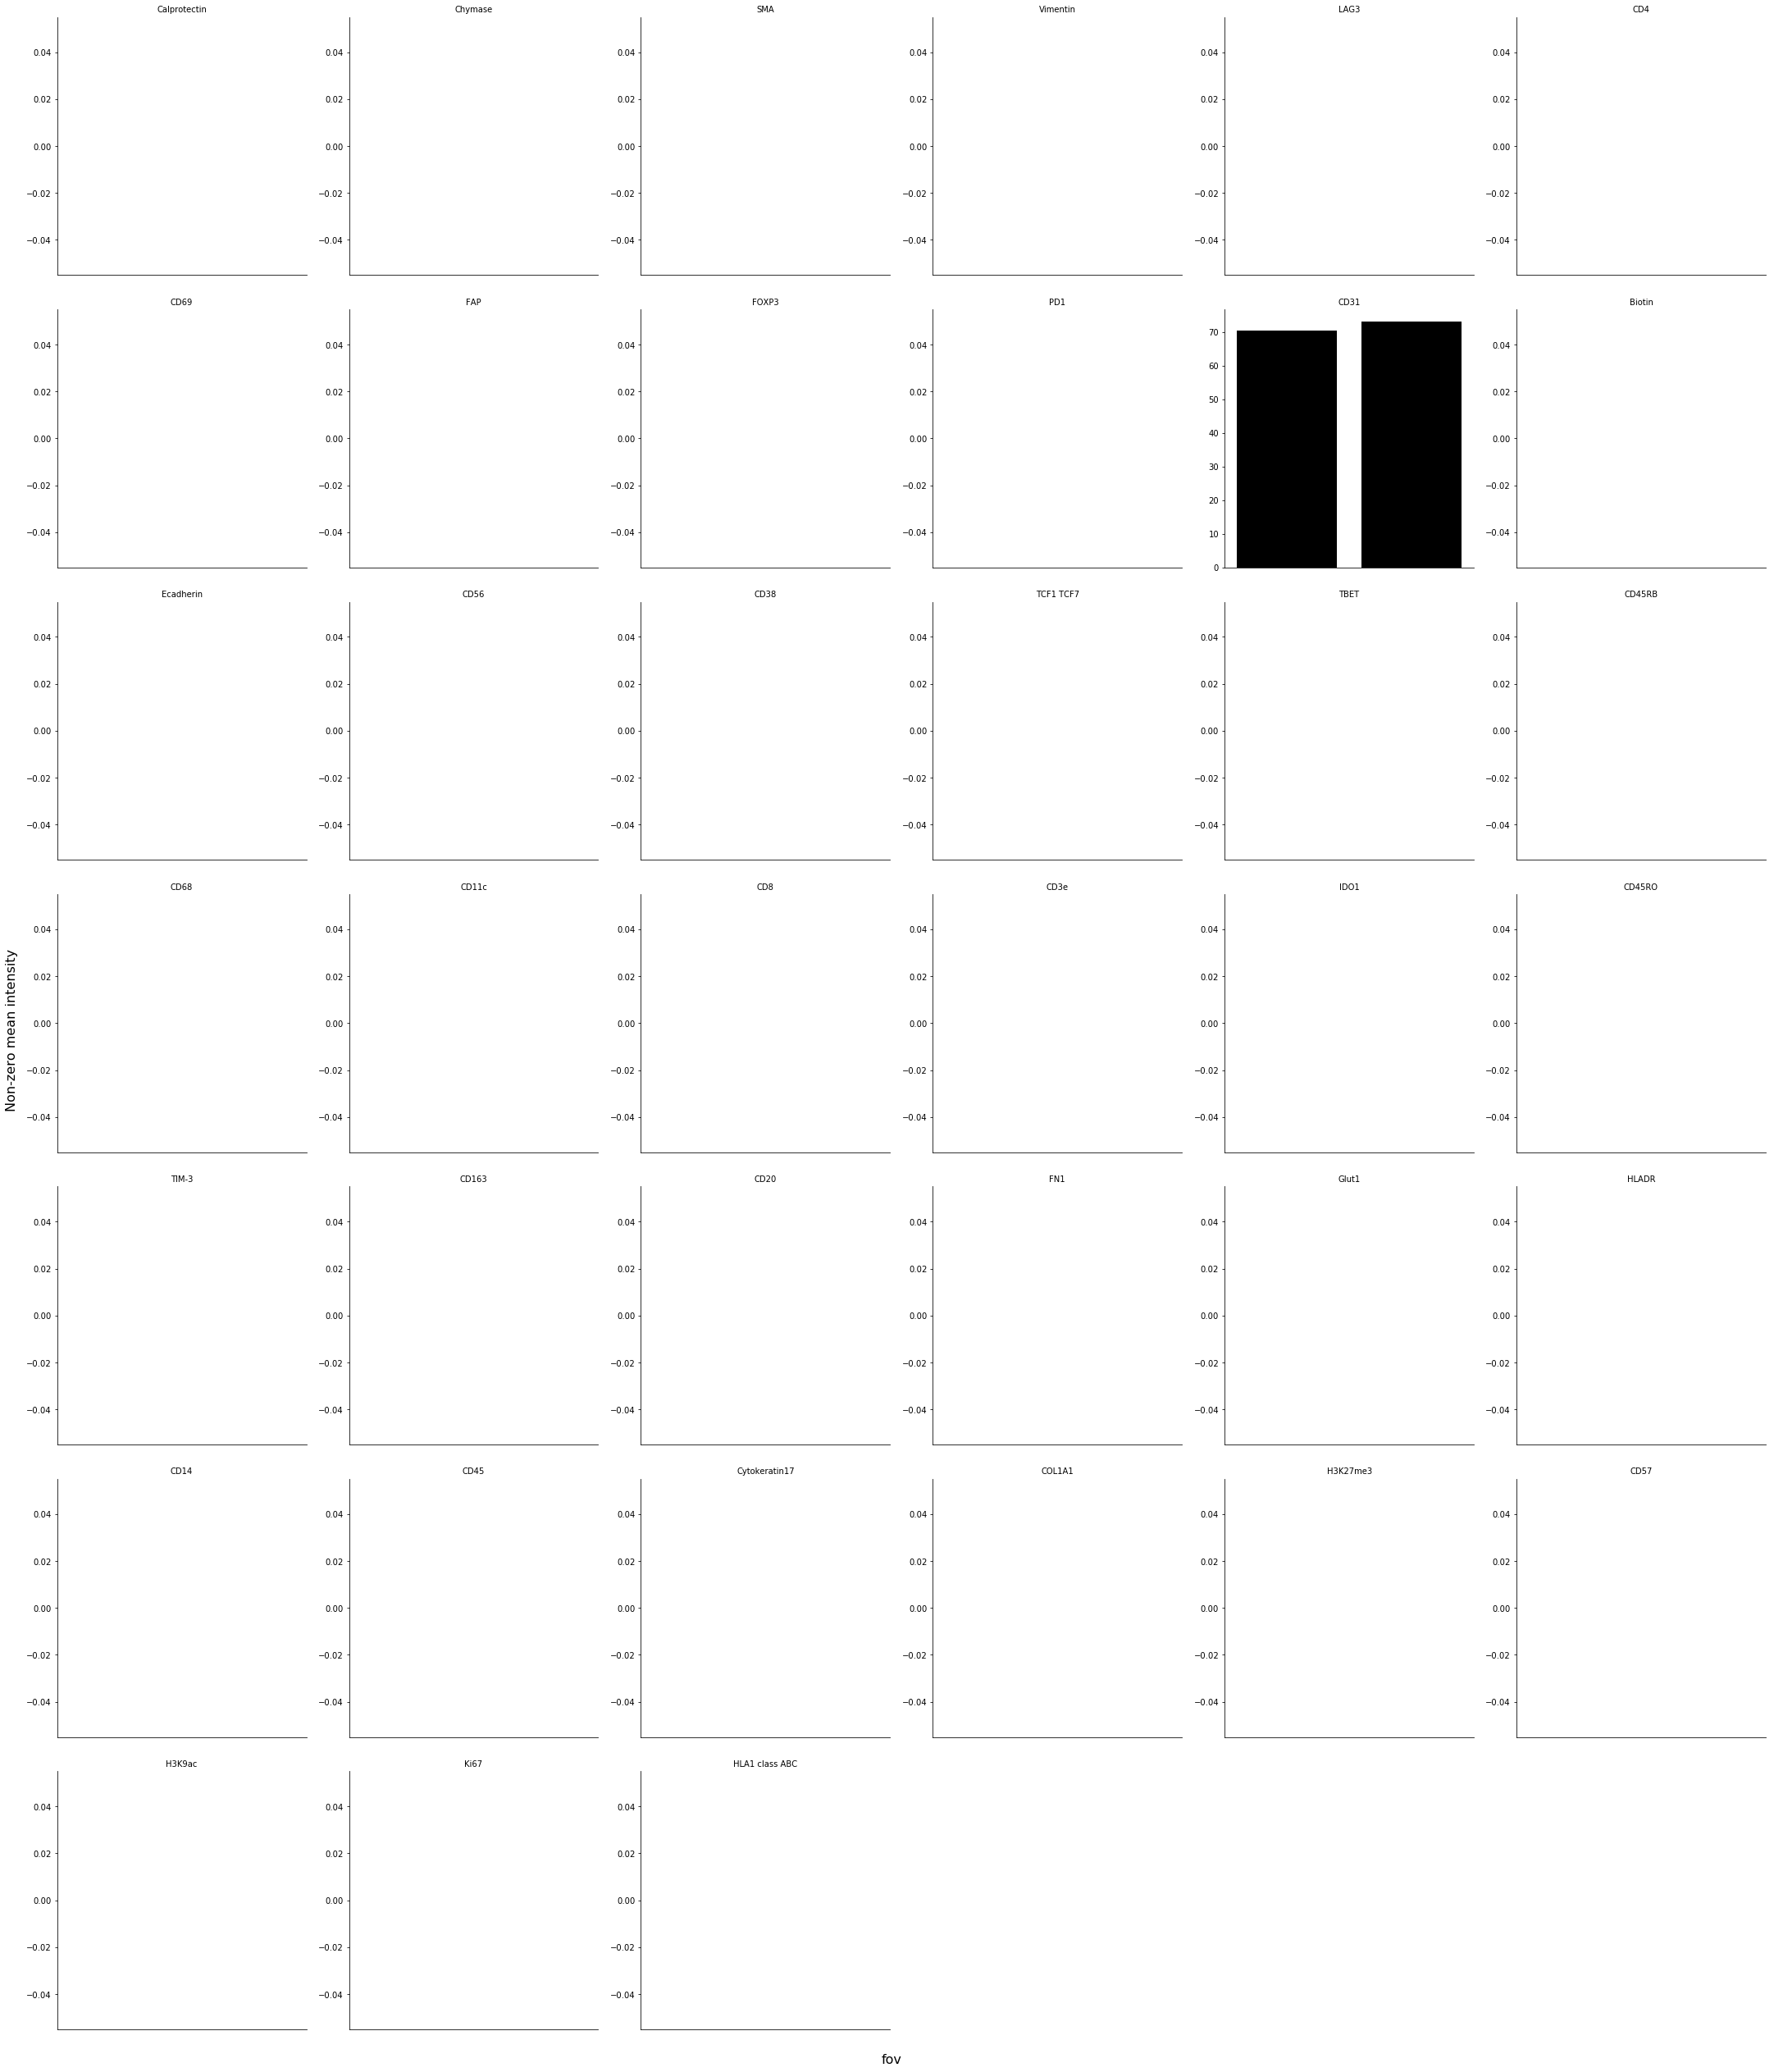

In [7]:
# visualize the non-zero mean intensity stats
df_nonzero_mean = pd.read_csv(os.path.join(bin_file_path, 'combined_nonzero_mean_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_nonzero_mean,
    'Non-zero mean intensity',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_dir
)

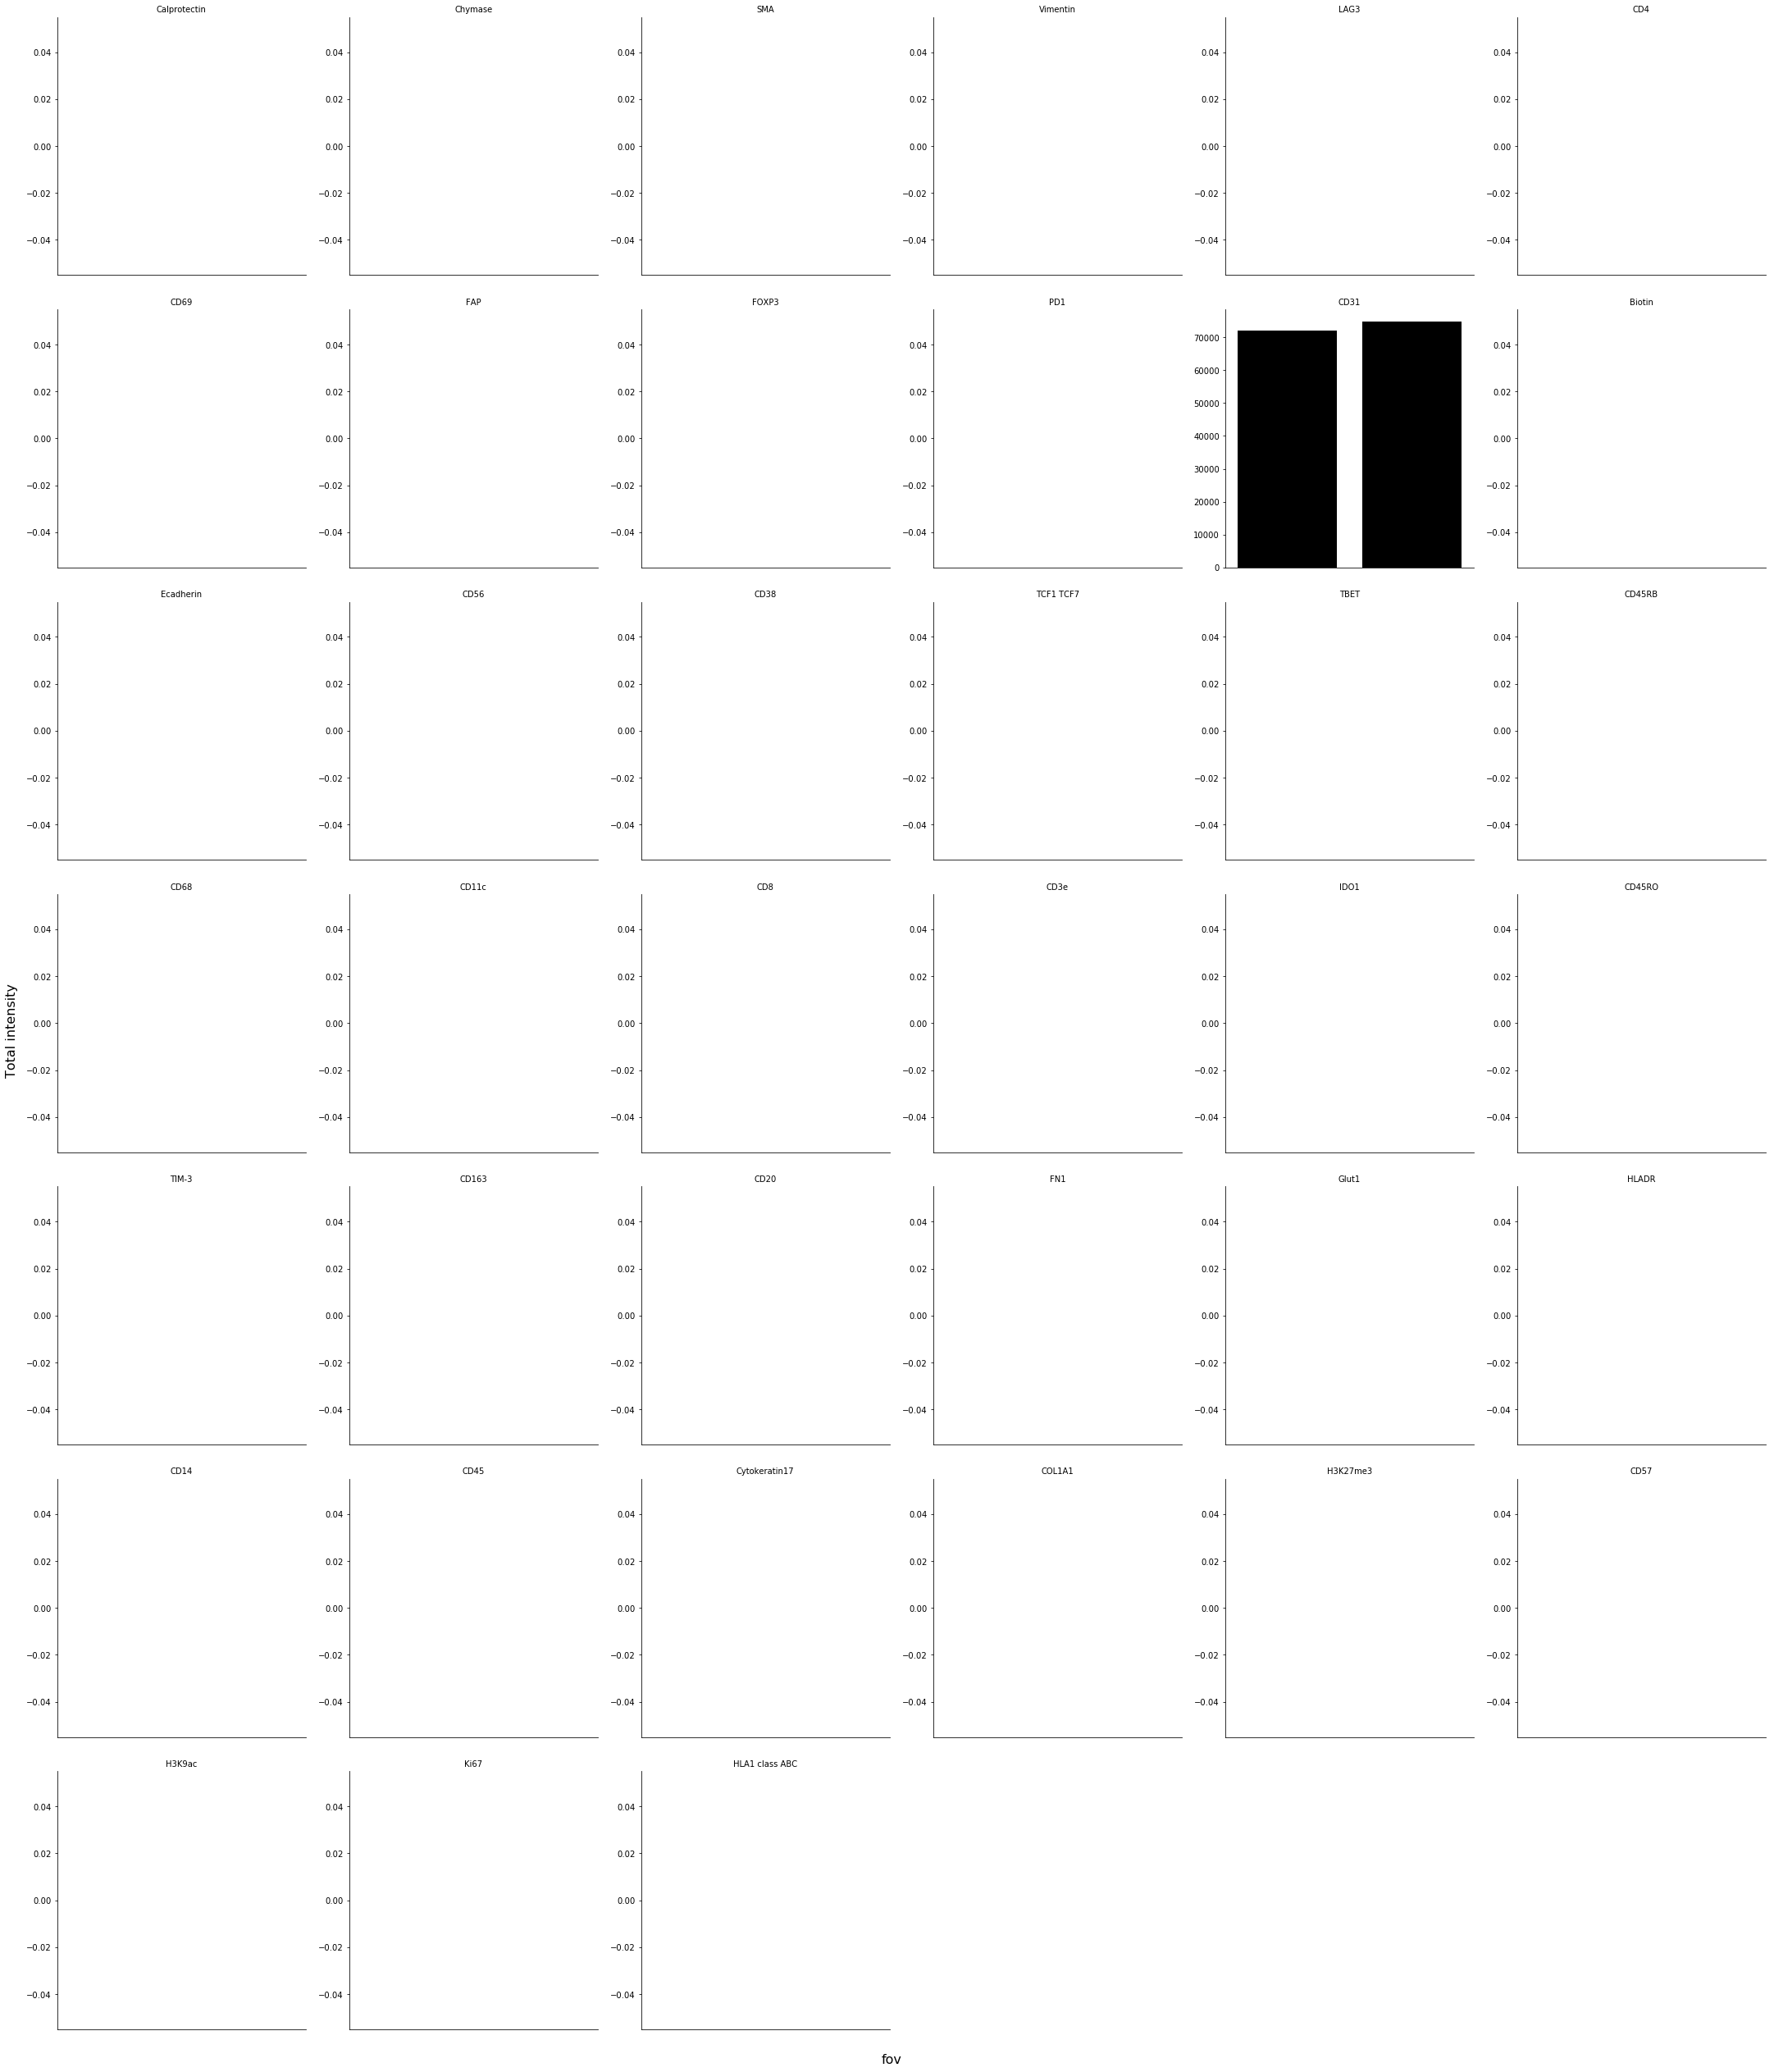

In [8]:
# visualize the total intensity stats
df_total_intensity = pd.read_csv(os.path.join(bin_file_path, 'combined_total_intensity_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_total_intensity,
    'Total intensity',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_dir
)

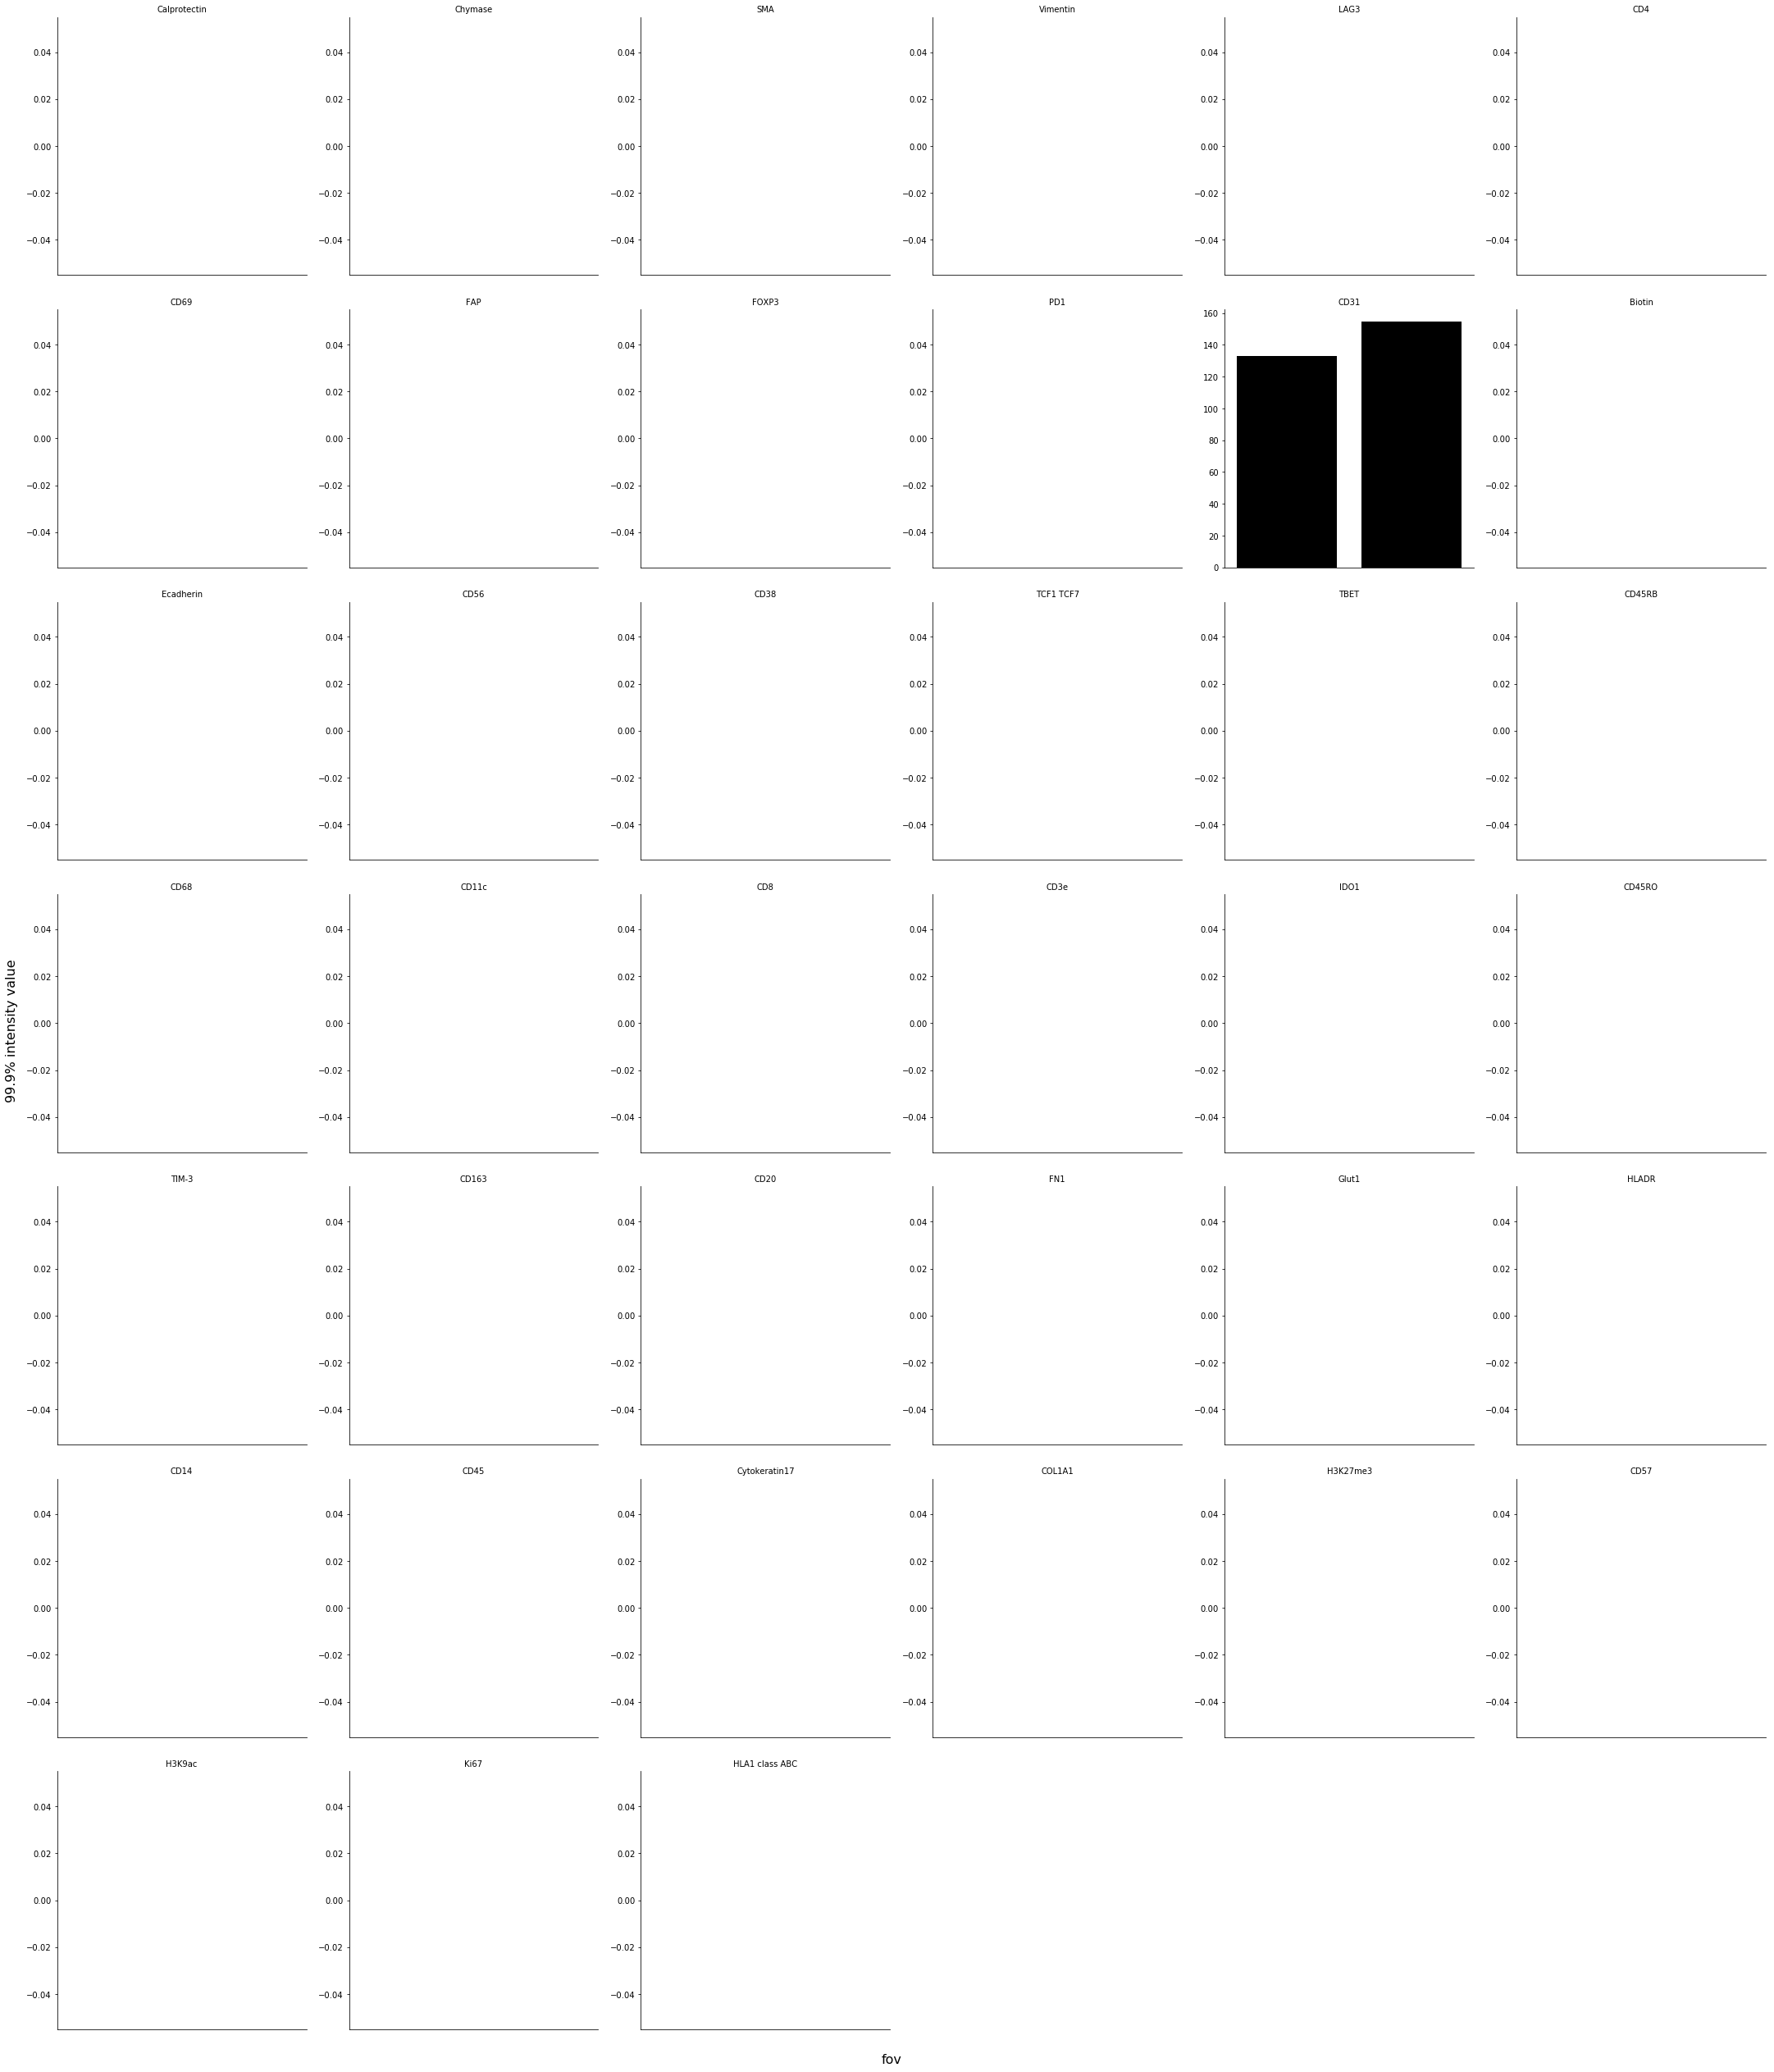

In [9]:
# visualize the 99.9% intensity value stats
df_99_9_intensity = pd.read_csv(os.path.join(bin_file_path, 'combined_percentile_99_9_stats.csv'))

qc_comp.visualize_qc_metrics(
    df_99_9_intensity,
    '99.9% intensity value',
    axes_size=16,
    wrap=6,
    dpi=None,
    save_dir=qc_dir
)